In [1]:
pip install pandas numpy scikit-learn xgboost textblob matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\bjeev\\Downloads\\AI.xlsx"  # Update this path as per your file location
df = pd.read_excel(file_path)


In [6]:
# Drop unnecessary columns
df = df.drop(columns=["ID", "Name", "Reason for decision"])

# Feature Engineering
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

# Resume and Job Description Similarity
resume_jd_tfidf = tfidf_vectorizer.fit_transform(df["Resume"] + " " + df["Job Description"])
df["resume_jd_similarity"] = [cosine_similarity(resume_jd_tfidf[i], resume_jd_tfidf[i])[0, 0] for i in range(len(df))]

# Resume and Transcript Similarity
resume_transcript_tfidf = tfidf_vectorizer.fit_transform(df["Resume"] + " " + df["Transcript"])
df["resume_transcript_similarity"] = [cosine_similarity(resume_transcript_tfidf[i], resume_transcript_tfidf[i])[0, 0] for i in range(len(df))]

# Sentiment Analysis on Transcript
df["transcript_sentiment"] = df["Transcript"].apply(lambda text: TextBlob(text).sentiment.polarity)
df["transcript_subjectivity"] = df["Transcript"].apply(lambda text: TextBlob(text).sentiment.subjectivity)

# Length of Transcript
df["transcript_length"] = df["Transcript"].apply(len)

# Encode Target Variable
df["decision_encoded"] = df["decision"].map({"selected": 1, "rejected": 0})


In [9]:
# Define feature matrix (X) and target vector (y)
X = df[["resume_jd_similarity", "resume_transcript_similarity", "transcript_sentiment",
        "transcript_subjectivity", "transcript_length"]]
y = df["decision_encoded"]

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train models and evaluate
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    results.append({"Model": name, "Accuracy": accuracy, "ROC AUC": roc_auc})

# Create a DataFrame for results
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  ROC AUC
0  Logistic Regression     0.750   0.8075
1        Decision Tree     0.550   0.5500
2        Random Forest     0.675   0.7350
3              XGBoost     0.725   0.7100


C:\Users\bjeev\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:20:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


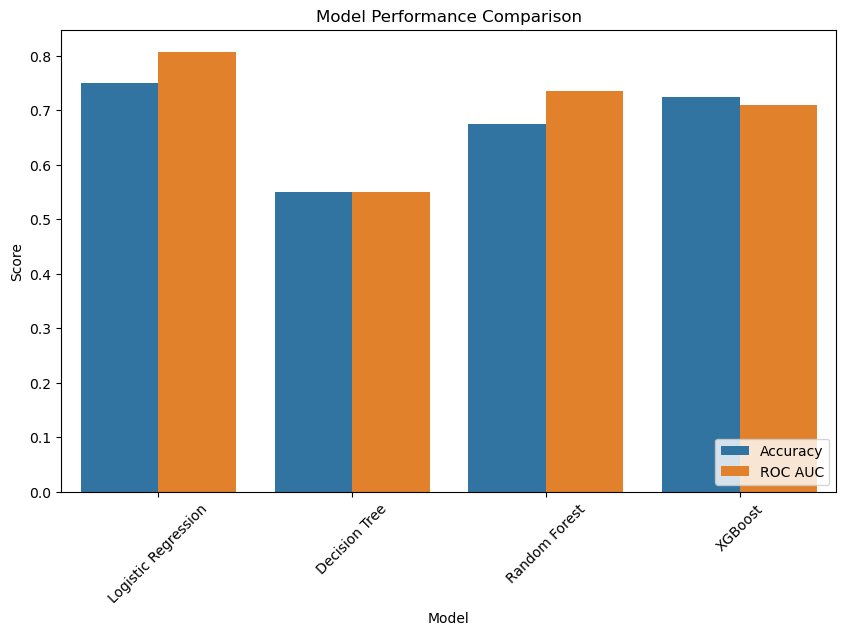

In [13]:
# Visualization of results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars=["Model"], var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()


In [3]:
from xgboost import XGBClassifier

# Initialize XGBoost without `use_label_encoder`
xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("XGBoost Accuracy:", accuracy)
print("XGBoost ROC AUC:", roc_auc)


NameError: name 'X_train' is not defined

Feature with the highest importance: Feature       transcript_length
Importance             0.425599
Name: 4, dtype: object


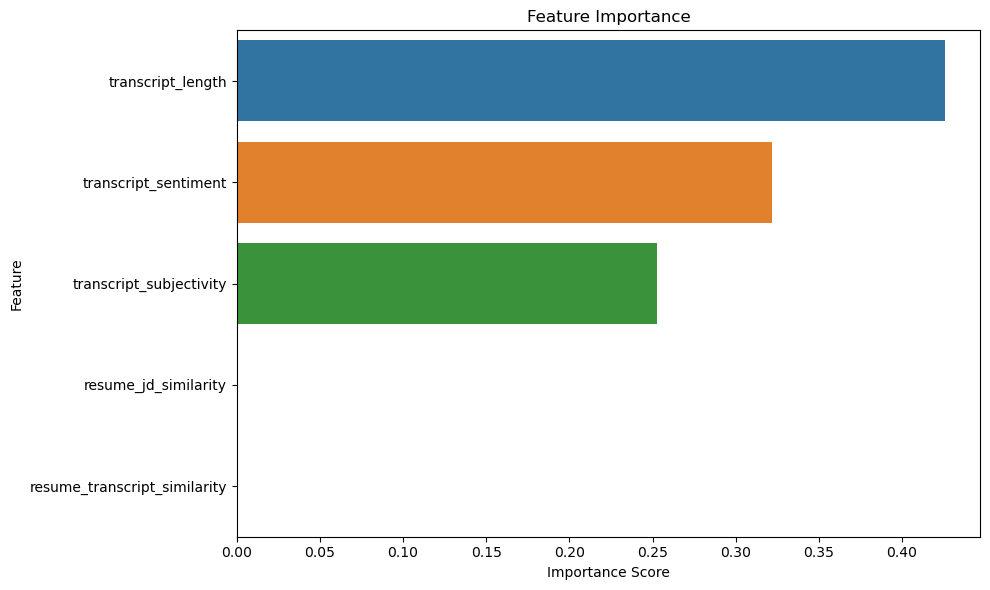

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the feature with the highest importance
print("Feature with the highest importance:", feature_importance.iloc[0])

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x="Importance", y="Feature", hue="Feature", dodge=False, legend=False)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()




In [23]:
pip install shap matplotlib scikit-learn



   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   -- ------------------------------------ 30.7/456.2 kB 640.0 kB/s eta 0:00:01
   ----- --------------------------------- 61.4/456.2 kB 656.4 kB/s eta 0:00:01
   --------- ---------------------------- 112.6/456.2 kB 819.2 kB/s eta 0:00:01
   ------------ ------------------------- 153.6/456.2 kB 913.1 kB/s eta 0:00:01
   ------------------ --------------------- 215.0/456.2 kB 1.1 MB/s eta 0:00:01
   --------------------- ------------------ 245.8/456.2 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 317.4/456.2 kB 1.1 MB/s eta 0:00:01
   ------------------------------- -------- 358.4/456.2 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 430.1/456.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 1.2 MB/s eta 0:00:00


In [31]:
pip install --upgrade scikit-learn



   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 403.5 kB/s eta 0:00:28
   ---------------------------------------- 0.1/11.1 MB 385.0 kB/s eta 0:00:29
    --------------------------------------- 0.2/11.1 MB 458.0 kB/s eta 0:00:24
    --------------------------------------- 0.2/11.1 MB 529.7 kB/s eta 0:00:21
   - -------------------------------------- 0.3/11.1 MB 655.5 kB/s eta 0:00:17
   - -------------------------------------- 0.3/11.1 MB 677.0 kB/s eta 0:00:16
   - -------------------------------------- 0.5/11.1 MB 805.0 kB/s eta 0:00:14
   - -------------------------------------- 0.5/11.1 MB 862.0 kB/s eta 0:00:13
   -- -----------

In [45]:
import sklearn
print(sklearn.__version__)  


1.6.1


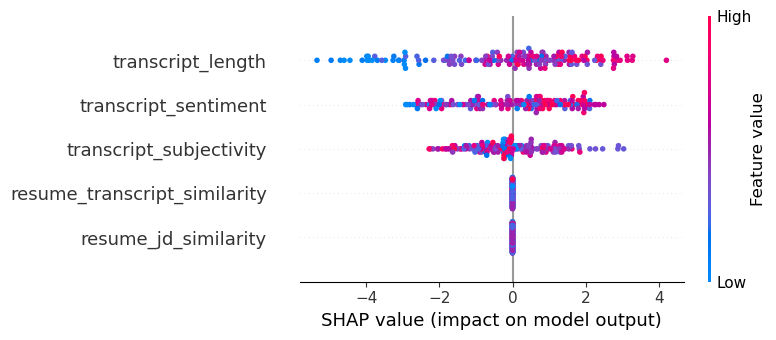

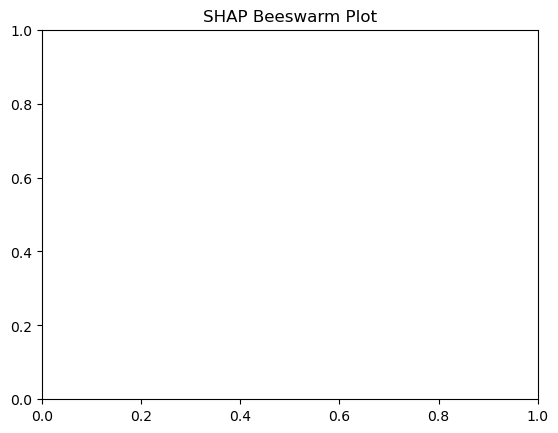

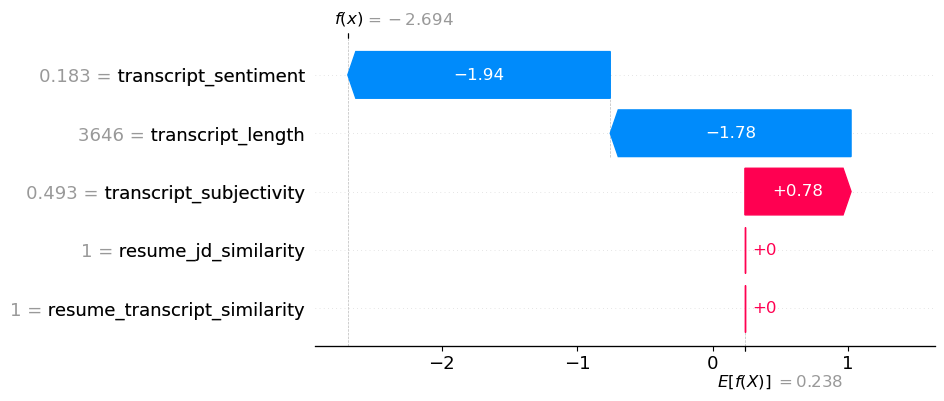

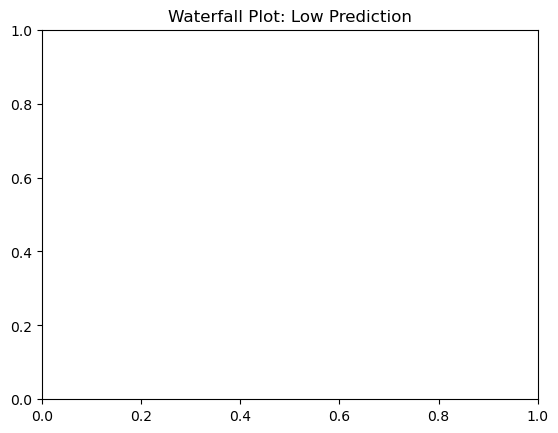

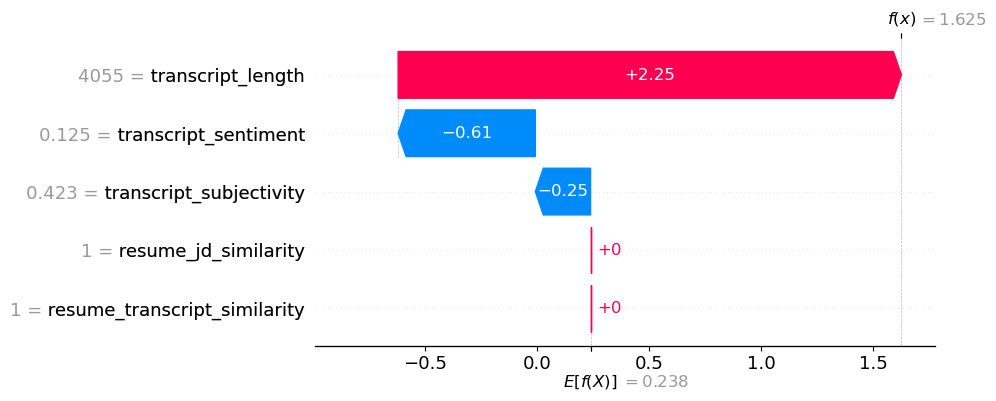

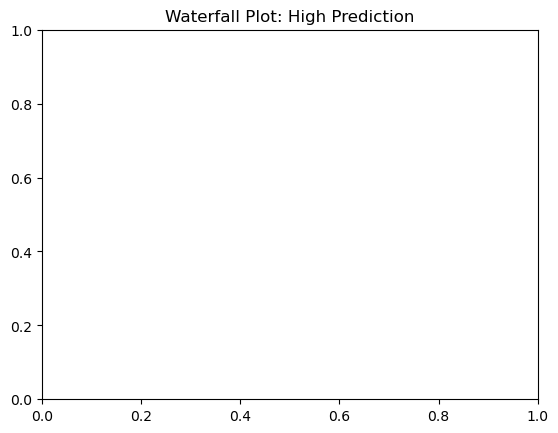

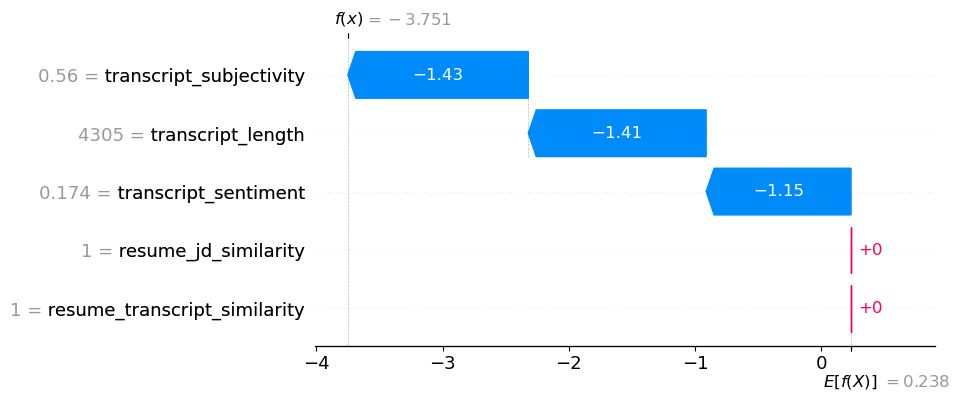

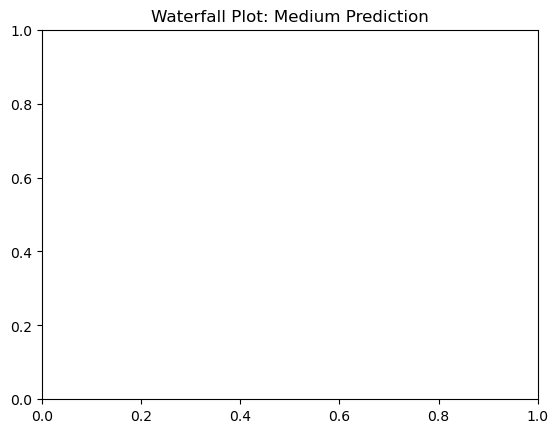

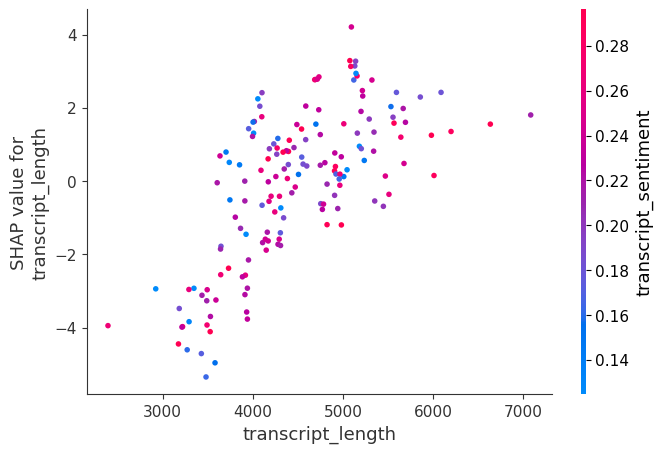

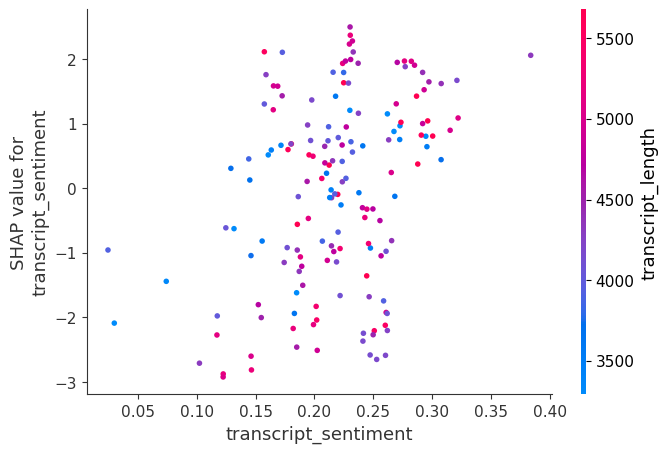

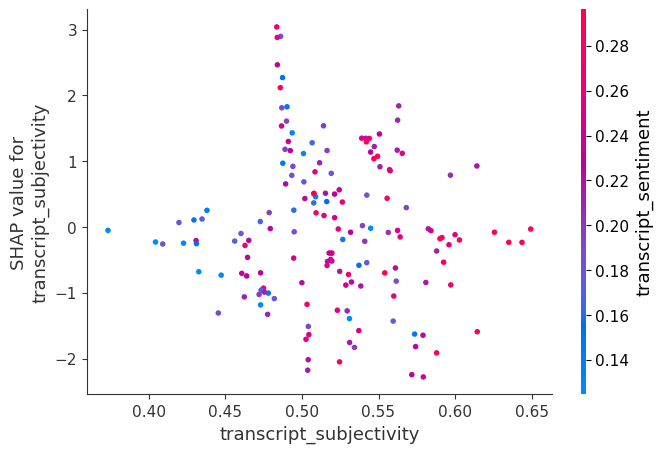

In [17]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Assuming `xgb_model` is trained and `X_train` is available
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

# --- SHAP Beeswarm Plot ---
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train)
plt.title("SHAP Beeswarm Plot")
plt.show()

# --- SHAP Waterfall Plots ---
# Low prediction
low_pred_idx = np.argmin(xgb_model.predict_proba(X_test)[:, 1])
shap.waterfall_plot(shap_values[low_pred_idx], max_display=10)
plt.title("Waterfall Plot: Low Prediction")
plt.show()

# High prediction
high_pred_idx = np.argmax(xgb_model.predict_proba(X_test)[:, 1])
shap.waterfall_plot(shap_values[high_pred_idx], max_display=10)
plt.title("Waterfall Plot: High Prediction")
plt.show()

# Medium prediction
medium_pred_idx = np.argsort(xgb_model.predict_proba(X_test)[:, 1])[len(X_test) // 2]
shap.waterfall_plot(shap_values[medium_pred_idx], max_display=10)
plt.title("Waterfall Plot: Medium Prediction")
plt.show()

# --- SHAP Dependence Plots ---
# Dependence plots for top 3 features
top_features = shap_values.abs.mean(0).values.argsort()[-3:][::-1]
for feature_idx in top_features:
    shap.dependence_plot(feature_idx, shap_values.values, X_train)


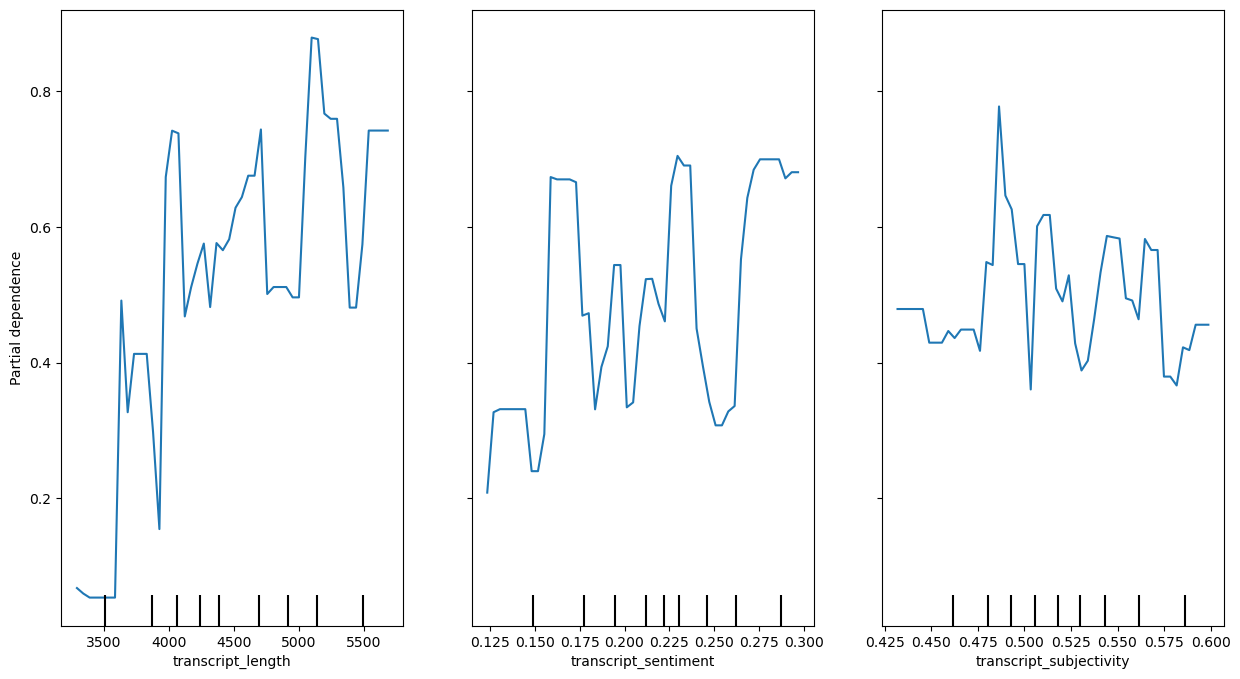

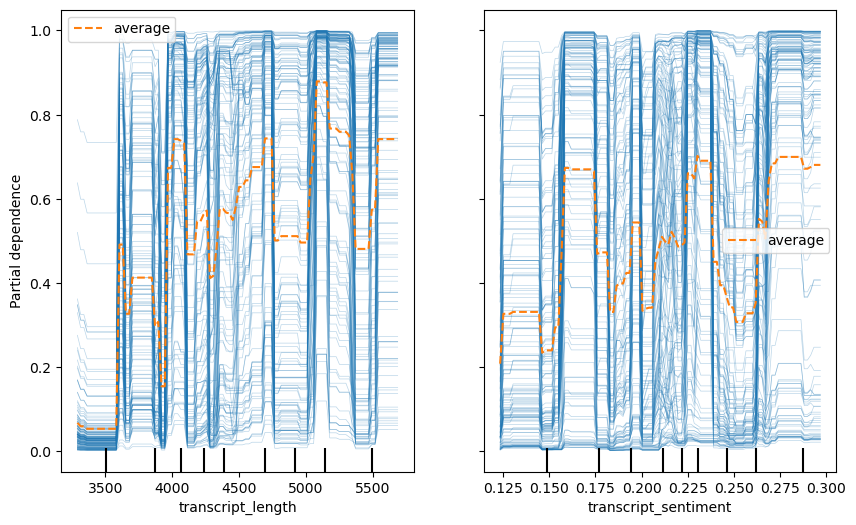

In [37]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# --- 1D Partial Dependence Plots ---
# Top 3 features for PDP
features_for_pdp = [X_train.columns[idx] for idx in top_features]
fig, ax = plt.subplots(figsize=(15, 8))
PartialDependenceDisplay.from_estimator(
    xgb_model, X_train, features=features_for_pdp, grid_resolution=50, ax=ax
)
plt.show()

# --- 2D Partial Dependence Plot ---
# Interaction of top 2 features
top_two_features = [X_train.columns[idx] for idx in top_features[:2]]
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    xgb_model, X_train, features=top_two_features, kind="both", ax=ax
)
plt.show()


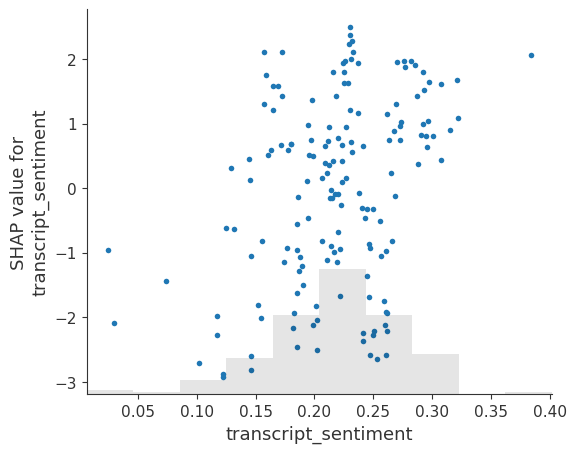

In [19]:
feature_name = "transcript_sentiment"  # Replace with the name of the feature
shap.plots.scatter(shap_values[:, feature_name], color=None)


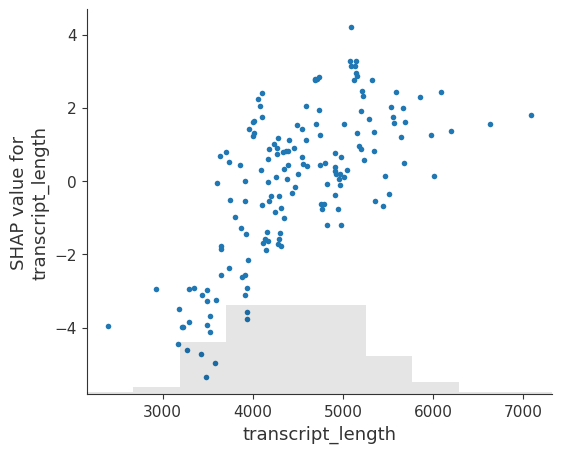

In [21]:
feature_name = "transcript_length"  # Replace with the name of the feature
shap.plots.scatter(shap_values[:, feature_name], color=None)


In [39]:
# Check consistency between SHAP and input data
assert shap_values.shape == X_train.shape, "SHAP values and input data do not align!"


In [41]:
import pandas as pd

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=["Feature1", "Feature2", "Feature3", ...])  # Replace with actual column names


In [43]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(X_train)


In [45]:
zero_variance_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
X_train = X_train.drop(columns=zero_variance_features)


In [47]:
import matplotlib
matplotlib.use("Agg")  # For headless environments, or try "TkAgg", "Qt5Agg", etc.


In [51]:
print("SHAP Values Shape:", shap_values.values.shape)
print("First SHAP Value:", shap_values[0])
print("Feature Names:", X_train.columns)


SHAP Values Shape: (160, 5)
First SHAP Value: .values =
array([ 0.        ,  0.        , -0.9902063 , -0.11314037, -1.3478831 ],
      dtype=float32)

.base_values =
0.053786304

.data =
array([1.00000000e+00, 1.00000000e+00, 2.46428571e-02, 4.04535002e-01,
       3.92400000e+03])
Feature Names: Index(['resume_jd_similarity', 'resume_transcript_similarity',
       'transcript_sentiment', 'transcript_subjectivity', 'transcript_length'],
      dtype='object')


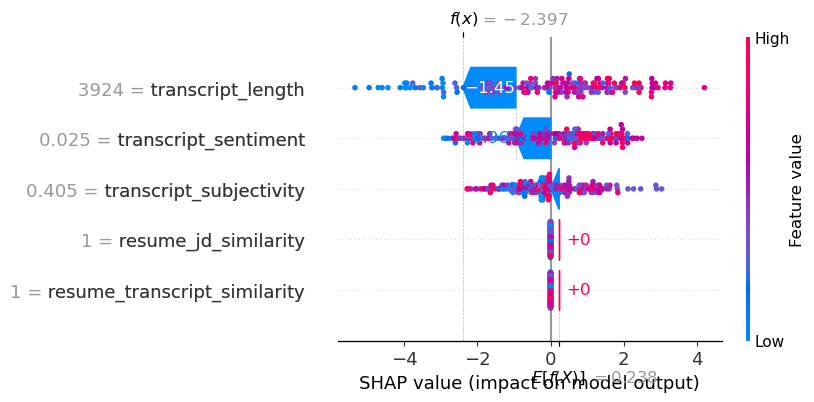

<Figure size 640x480 with 0 Axes>

In [55]:
# Save SHAP Beeswarm Plot
shap.summary_plot(shap_values, X_train, show=False)
plt.savefig("shap_beeswarm_plot.png", dpi=300)

# Save SHAP Waterfall Plot
shap.waterfall_plot(shap_values[0], max_display=10)
plt.savefig("shap_waterfall_plot.png", dpi=300)


In [59]:
print(xgb_model.predict_proba(X_test)[low_pred_idx, 1])  # Print the probability of the positive class


0.012793806


In [63]:
print(shap_values[low_pred_idx])


.values =
array([ 0.        ,  0.        , -0.955633  ,  0.52429557, -3.9683661 ],
      dtype=float32)

.base_values =
0.053786304

.data =
array([1.00000000e+00, 1.00000000e+00, 2.04342203e-01, 5.09866962e-01,
       3.34400000e+03])


In [65]:
import shap
shap_values = shap.TreeExplainer(xgb_model).shap_values(X_test)


In [67]:
print(xgb_model.predict_proba(X_test)[low_pred_idx])


[0.9872062  0.01279381]


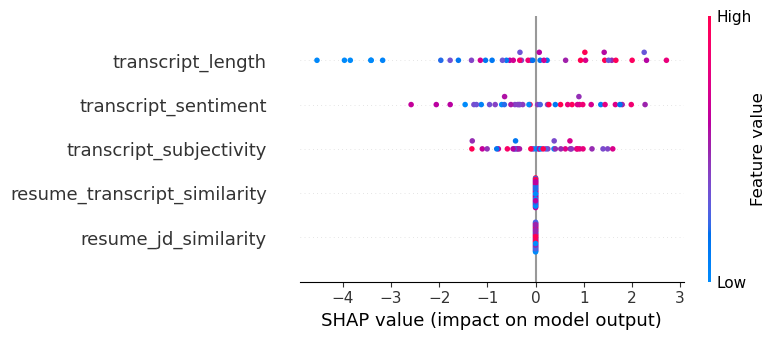

In [69]:
shap.summary_plot(shap_values, X_test)


In [7]:
pip install ipympl



  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
   ---------------------------------------- 0.0/515.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/515.7 kB 330.3 kB/s eta 0:00:02
   - ------------------------------------- 20.5/515.7 kB 330.3 kB/s eta 0:00:02
   - ------------------------------------- 20.5/515.7 kB 330.3 kB/s eta 0:00:02
   ----- --------------------------------- 71.7/515.7 kB 393.8 kB/s eta 0:00:02
   ----- --------------------------------- 71.7/515.7 kB 393.8 kB/s eta 0:00:02
   -------- ----------------------------- 112.6/515.7 kB 409.6 kB/s eta 0:00:01
   -------- ----------------------------- 112.6/515.7 kB 409.6 kB/s eta 0:00:01
   -------- ----------------------------- 112.6/515.7 kB 409.6 kB/s eta 0:00:01
   ----------- -------------------------- 153.6/515.7 kB 382.3 kB/s eta 0:00:01
   -----